**Semiconductor manufacturing process analysis**


**Project Objective**

The primary goal of this project is to build a machine learning model that can accurately predict whether a production entity passes or fails an in-house testing process, based on 591 measured features from sensor data. Each entity is labeled as "Pass" (-1) or "Fail" (1), and the objective is to determine the model that provides the highest accuracy in predicting these outcomes. Additionally, we aim to assess whether all features are necessary for building the model and if dimensionality reduction or feature elimination can enhance model performance.

**Project Steps**

**Step 1: Import and Explore the Data**

**Load the Data:** Load the dataset using pandas, check the shape, and preview the first few rows.

**Inspect Features:** Use .info(), .describe() and other inspection methods to understand data types, missing values, and general characteristics.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/corizo intern/uci-secom.csv')
print(data.info())
print(data.describe())
print(data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None
                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
me

**Step 2: Data Cleansing**

**Handle Missing Values:** Identify and treat missing values, either by filling them (fillna()) or removing columns/rows if needed. If domain knowledge indicates certain columns can be dropped due to lack of relevance, do so logically.

**Drop Irrelevant Attributes:** If attributes like timestamps or non-informative features (e.g., constant columns) exist, they should be dropped.

**Other Modifications:**
Ensure target labels are in the correct format, and map the labels (-1 for pass and 1 for fail) if needed.
Check for any inconsistent data types or values that should be handled.

In [8]:


# Check for missing values
missing_values = data.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

# Drop columns with more than 30% missing values
threshold = len(data) * 0.3
data_cleaned = data.dropna(thresh=threshold, axis=1)
print(f"Shape after dropping columns with >30% missing values: {data_cleaned.shape}")

# Separate numeric and non-numeric columns
numeric_cols = data_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = data_cleaned.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with the median
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].median())

# Handle non-numeric columns (optional: you can drop or process them separately)
# Here, we'll drop non-numeric columns for simplicity
data_cleaned = data_cleaned.drop(columns=non_numeric_cols, errors='ignore')

# Drop the 'Time' column (if it exists and is unnecessary)
data_cleaned = data_cleaned.drop(columns=['Time'], errors='ignore')

# Verify the cleaned data
print("Data after cleaning:\n", data_cleaned.info())


Columns with missing values:
 0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 538, dtype: int64
Shape after dropping columns with >30% missing values: (1567, 584)


<ipython-input-8-3dca7c4395a3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].median())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 583 entries, 0 to Pass/Fail
dtypes: float64(582), int64(1)
memory usage: 7.0 MB
Data after cleaning:
 None


**Step 3: Data Analysis & Visualization**

Perform thorough analysis to understand feature distributions and relationships:

**Univariate Analysis:**
Visualize the distribution of each feature using histograms or boxplots. Pay attention to the target variable distribution.

**Bivariate Analysis:**
Use pairwise correlation (e.g., using a heatmap) to identify relationships between features and the target variable.
Visualize features against the target using scatterplots or bar charts.

**Multivariate Analysis:**
Analyze the combined effect of multiple variables using techniques such as pair plots, or conduct principal component analysis (PCA) to see feature clustering

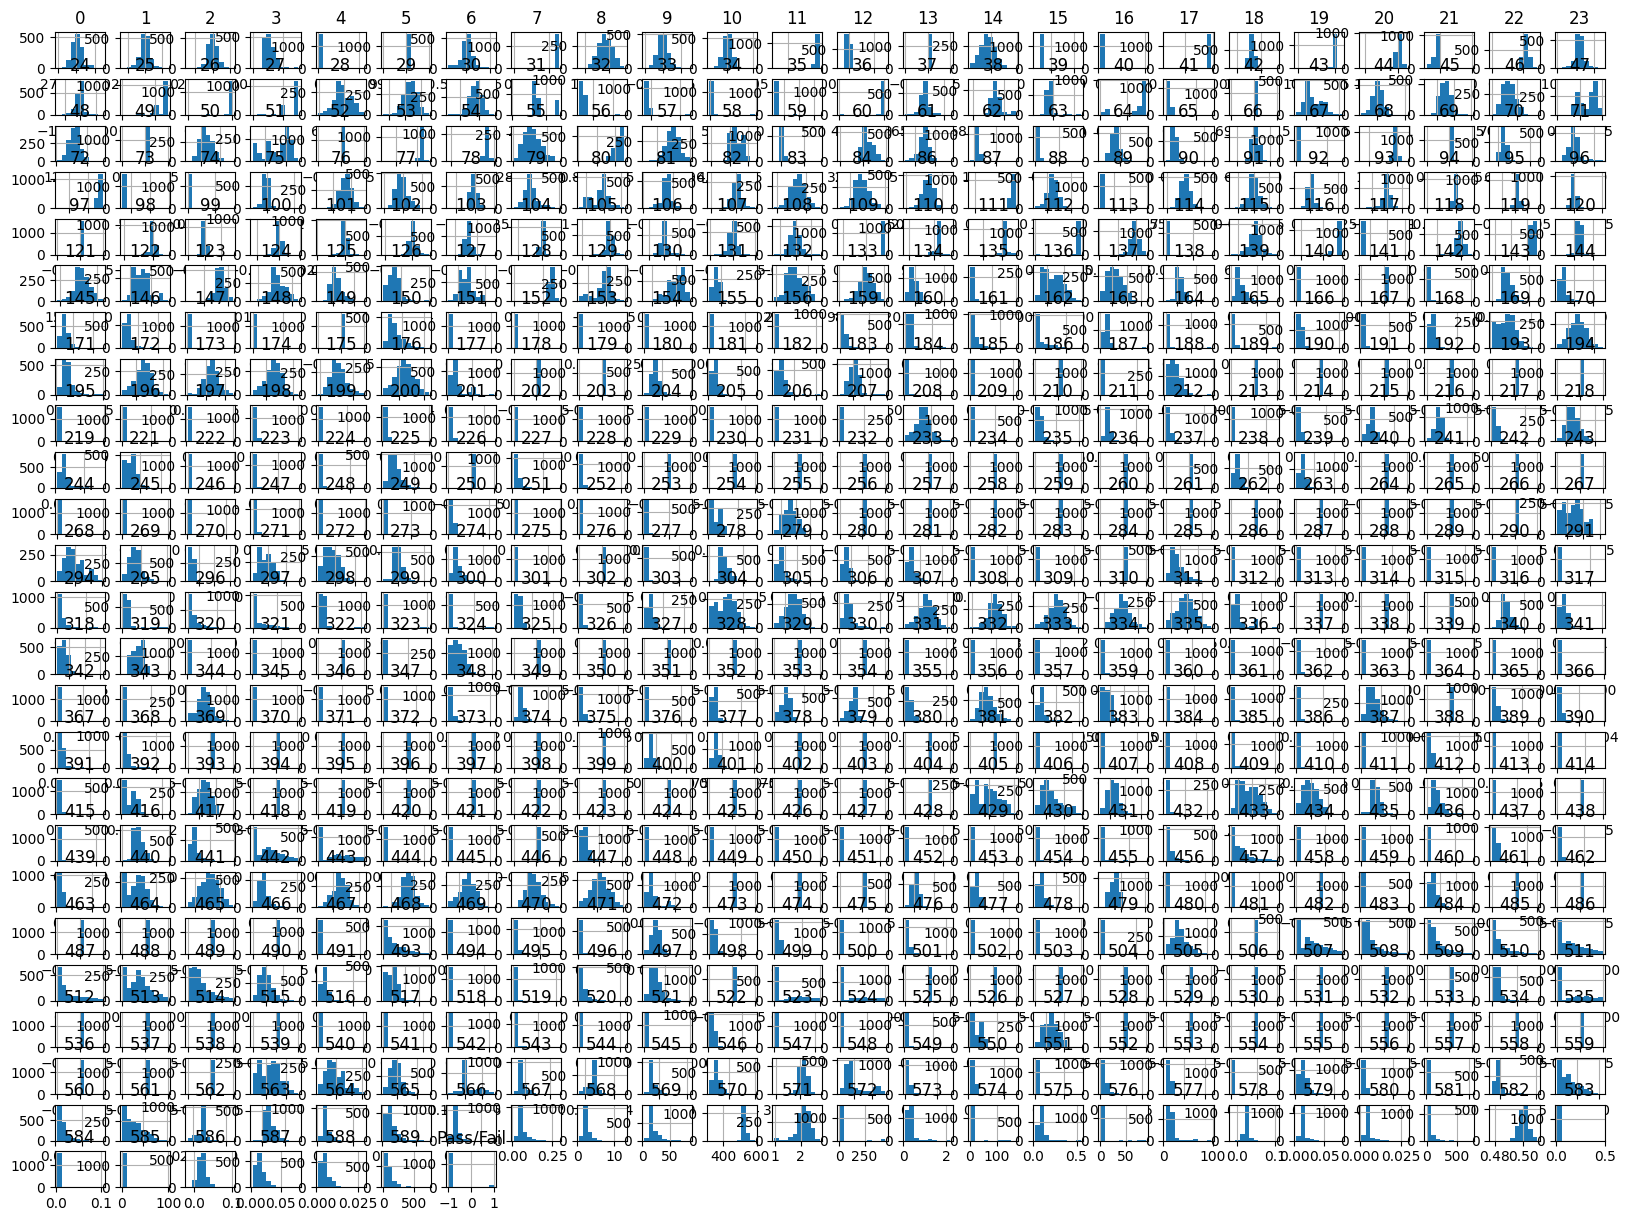

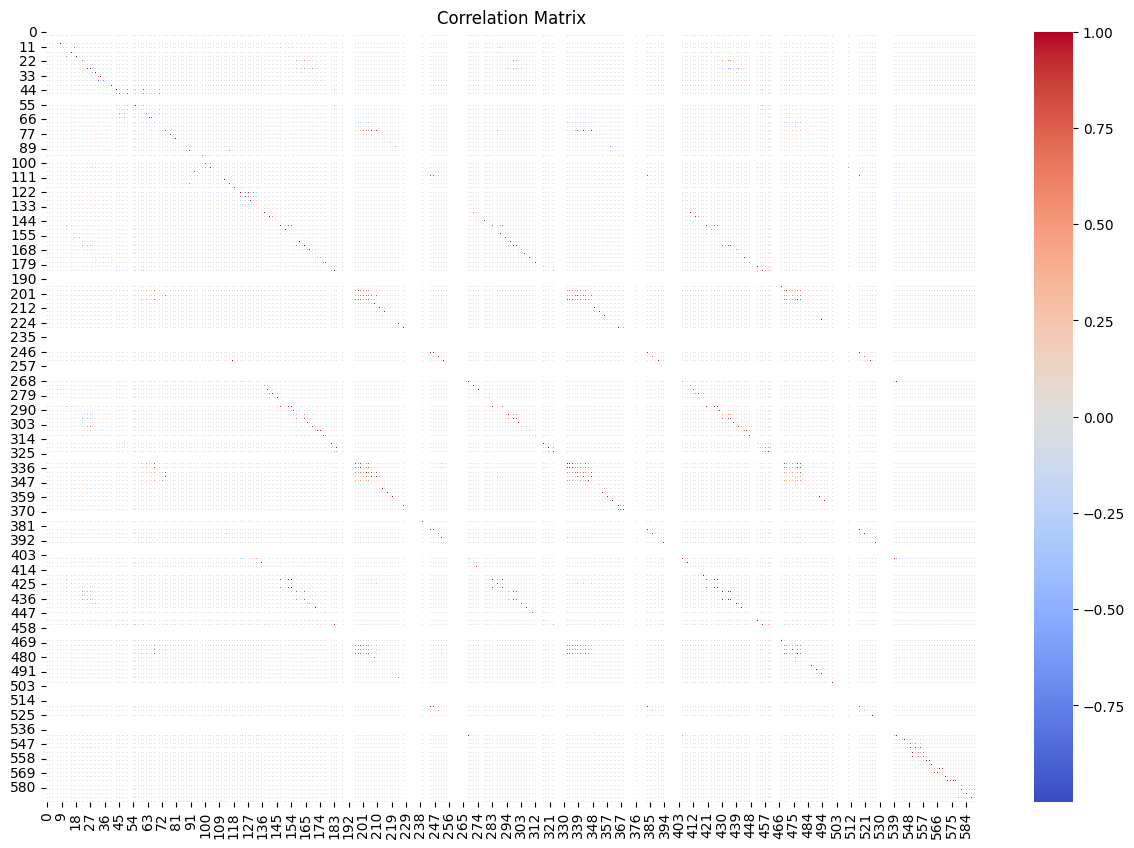

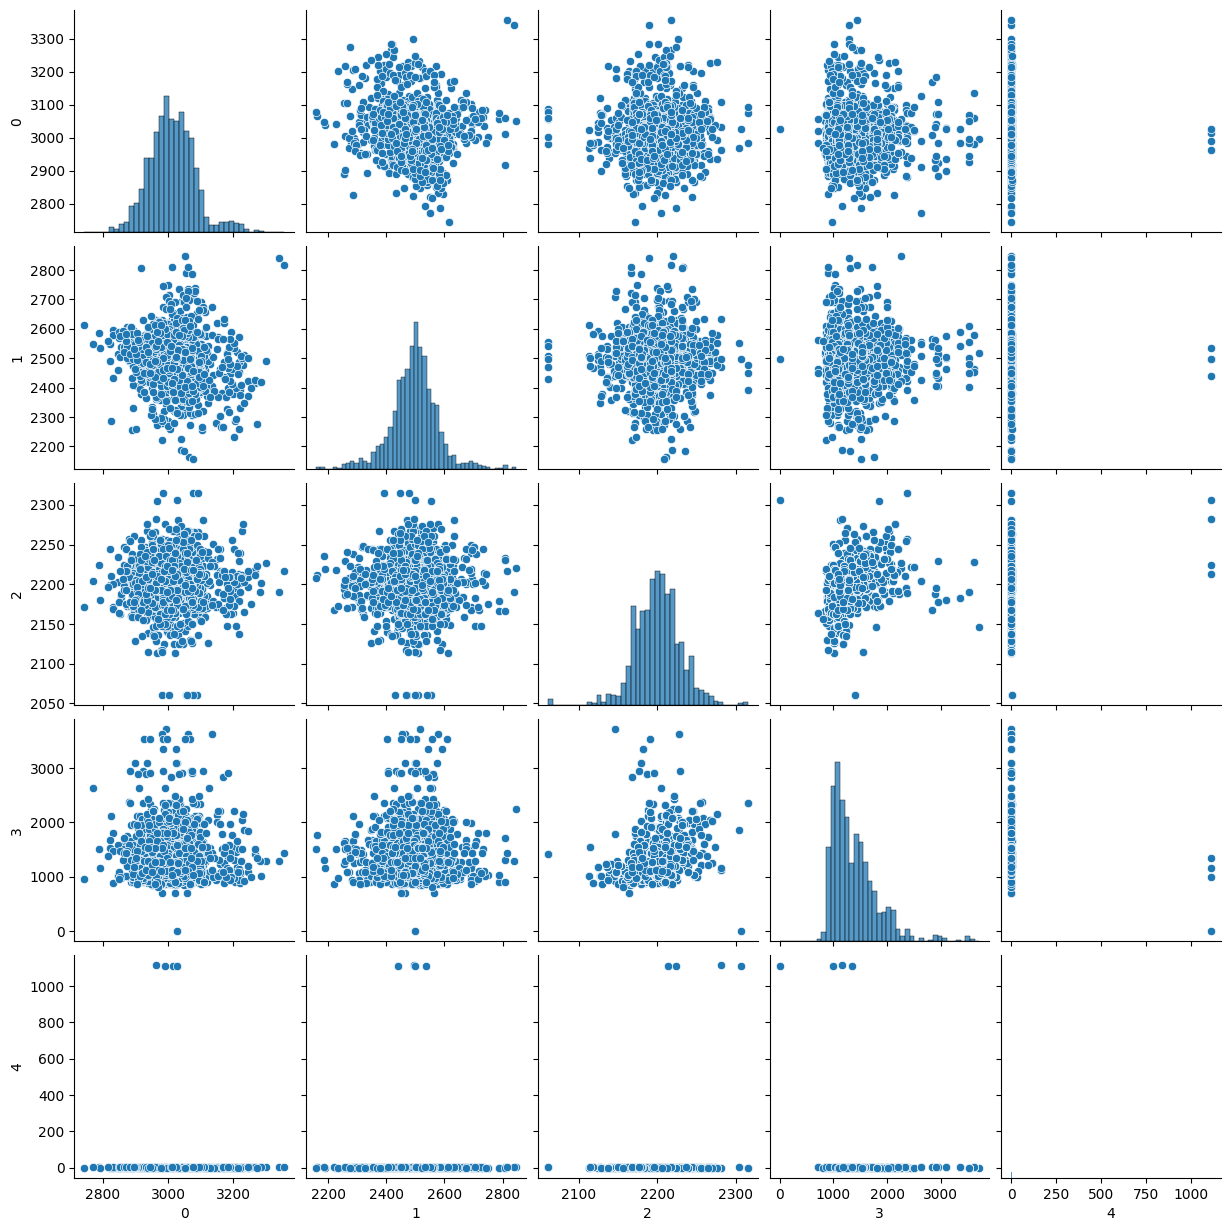

In [10]:


# Univariate Analysis: Distribution of each numeric column
data_cleaned.describe()

# Histogram for numerical features
data_cleaned.hist(figsize=(20, 15))
plt.show()

# Bivariate Analysis: Correlation Matrix
corr_matrix = data_cleaned.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Multivariate Analysis: Pairplot for selected features
selected_features = data_cleaned.columns[:5]  # Use a subset for readability
sns.pairplot(data_cleaned[selected_features])
plt.show()


**Step 4:Data Preprocessing**

**Segregate Features and Target:**Separate the feature set (predictors) from the target variable (Pass/Fail).

**Target Balancing:**Check if the dataset is imbalanced. If the Pass/Fail ratio is highly imbalanced, apply SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset before model training.

**Train-Test Split:** Split the dataset into training and testing sets using train_test_split() from sklearn. Commonly used ratios are 80/20 or 70/30.

**Standardize/Normalize Data:** Use StandardScaler or MinMaxScaler from sklearn to scale the data. Standardization is important to ensure that features with different ranges are treated equally by the model.

**Check Statistical Properties:** Ensure the train and test sets have similar statistical characteristics using .describe() or other statistical tests like KS-Test or Chi-square test.

In [12]:
# Assuming 'Outcome' is the target variable and the rest are predictors
X = data_cleaned.drop(columns=['Pass/Fail'])  # Features
y = data_cleaned['Pass/Fail']  # Target


Check for Target Balancing and Fix it (using SMOTE)

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check for imbalance in the target variable
print("Target distribution before SMOTE:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the new distribution
print("Target distribution after SMOTE:", Counter(y_res))


Target distribution before SMOTE: Counter({-1: 1463, 1: 104})
Target distribution after SMOTE: Counter({-1: 1463, 1: 1463})


Train-Test Split and Standardization

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Standardize the data (on the train set and then apply to test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Check if Train and Test Data Have Similar Statistics

In [15]:
# Compare the statistical characteristics of train and test sets
print("Train set statistics:\n", pd.DataFrame(X_train_scaled).describe())
print("Test set statistics:\n", pd.DataFrame(X_test_scaled).describe())


Train set statistics:
                 0             1             2             3             4    \
count  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03   
mean   3.590878e-16 -4.475587e-16 -1.975850e-15 -3.625572e-16 -6.938894e-18   
std    1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00   
min   -3.719532e+00 -4.666018e+00 -5.116029e+00 -1.769555e+00 -4.945106e-02   
25%   -6.672306e-01 -5.256983e-01 -6.616580e-01 -7.255539e-01 -3.829153e-02   
50%   -1.312906e-01  3.915595e-02 -7.172336e-02 -2.272945e-01 -3.141001e-02   
75%    5.669510e-01  5.407980e-01  5.668102e-01  5.454440e-01 -2.645021e-02   
max    4.939374e+00  4.920644e+00  4.257308e+00  6.299179e+00  3.198392e+01   

          5             6             7             8             9    ...  \
count  2048.0  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03  ...   
mean      0.0  1.110223e-16 -1.639314e-16  1.110223e-15  1.908196e-17  ...   
std       0.0  1.000244e+00  1.

**5. Model Training, Testing, and Tuning**

**Model Training & Cross-Validation**

**Three models:** RandomForest, SVM, and Naive Bayes, and apply cross-validation and grid search for hyperparameter tuning.
Supervised Learning Models:

**Random Forest:** Train a random forest classifier as it is well-suited for high-dimensional data like this.

**SVM (Support Vector Machine):** Test with SVM, which is good for classification tasks.

**Naive Bayes:** Simple and interpretable model for classification.

**For each model:**

Perform cross-validation to check model performance on different splits of the data.
Use GridSearchCV to tune hyperparameters, such as the number of trees in a Random Forest or the kernel in SVM.

**Dimensionality Reduction:**

Apply PCA to reduce the feature space and analyze whether a reduced number of features improve model performance.
Alternatively, apply feature selection techniques (e.g., using SelectKBest or Recursive Feature Elimination, RFE).

**Model Performance:**

Use classification metrics: accuracy, precision, recall, F1-score, and AUC-ROC.
Visualize performance using confusion matrices and ROC curves.

**Compare Models:**

Create a comparison table showing performance metrics (train and test accuracies) for all models.
Select the model with the best trade-off between train and test performance.

**Save the Best Model:**

Once the best-performing model is selected, save it using joblib or pickle for future use.




**RandomForest Model with GridSearchCV**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# RandomForest Model with GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for RandomForest
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = grid_rf.best_estimator_.predict(X_test_scaled)

# Classification Report
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))


RandomForest Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.99      0.99       439
           1       0.99      0.98      0.99       439

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



**Support Vector Machine (SVM) Model with GridSearchCV**

In [17]:
from sklearn.svm import SVC

# SVM Model with GridSearchCV
svc = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV for SVM
grid_svm = GridSearchCV(estimator=svc, param_grid=param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = grid_svm.best_estimator_.predict(X_test_scaled)

# Classification Report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      0.99       439
           1       0.99      1.00      0.99       439

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



**Naive Bayes Model**

In [18]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb.predict(X_test_scaled)

# Classification Report
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.19      0.32       439
           1       0.55      0.98      0.71       439

    accuracy                           0.59       878
   macro avg       0.74      0.59      0.51       878
weighted avg       0.74      0.59      0.51       878



**Model Comparison**

In [19]:
# Display the train and test accuracies for all models
rf_train_acc = grid_rf.best_estimator_.score(X_train_scaled, y_train)
rf_test_acc = grid_rf.best_estimator_.score(X_test_scaled, y_test)

svm_train_acc = grid_svm.best_estimator_.score(X_train_scaled, y_train)
svm_test_acc = grid_svm.best_estimator_.score(X_test_scaled, y_test)

nb_train_acc = nb.score(X_train_scaled, y_train)
nb_test_acc = nb.score(X_test_scaled, y_test)

print(f"RandomForest - Train Accuracy: {rf_train_acc:.2f}, Test Accuracy: {rf_test_acc:.2f}")
print(f"SVM - Train Accuracy: {svm_train_acc:.2f}, Test Accuracy: {svm_test_acc:.2f}")
print(f"Naive Bayes - Train Accuracy: {nb_train_acc:.2f}, Test Accuracy: {nb_test_acc:.2f}")


RandomForest - Train Accuracy: 1.00, Test Accuracy: 0.99
SVM - Train Accuracy: 1.00, Test Accuracy: 0.99
Naive Bayes - Train Accuracy: 0.60, Test Accuracy: 0.59


**Final Model Selection and Saving**

In [20]:
import joblib

# Based on the comparison, select the best model (e.g., RandomForest)
best_model = grid_rf.best_estimator_

# Save the model for future use
joblib.dump(best_model, 'best_model_rf.pkl')


['best_model_rf.pkl']

**Step 6: Conclusion & Improvisation**

After performing extensive data preprocessing, including missing value imputation, feature scaling, and addressing target class imbalance using SMOTE, we trained three machine learning models—RandomForest, Support Vector Machine (SVM), and Naive Bayes—on the dataset. The models were evaluated using cross-validation and hyperparameter tuning to achieve optimal performance.

**1. RandomForest Classifier:**

Accuracy: 99%

Precision (Class -1): 0.98

Precision (Class 1): 0.99

Recall (Class -1): 0.99

Recall (Class 1): 0.98

F1-Score (Class -1): 0.99

F1-Score (Class 1): 0.99

**Comments:**

The RandomForest model achieved 99% accuracy, with near-perfect precision, recall, and F1-scores for both classes.
The balanced performance across both classes indicates that it can correctly predict both Pass (-1) and Fail (1) outcomes without bias toward one class.
This model has a slight imbalance in precision and recall for class 1 (Fail), but the difference is minimal.

**2. Support Vector Machine (SVM):**

Accuracy: 99%

Precision (Class -1): 1.00

Precision (Class 1): 0.99

Recall (Class -1): 0.99

Recall (Class 1): 1.00

F1-Score (Class -1): 0.99

F1-Score (Class 1): 0.99

**Comments:**

The SVM model also achieved 99% accuracy, showing a very similar performance to the RandomForest model.
Its precision, recall, and F1-scores for both classes are almost perfect, but it's slightly skewed in favor of class -1 (Pass) in terms of precision.
The SVM model requires more computational resources than RandomForest and may not be as interpretable.

**3. Naive Bayes Classifier:**

Accuracy: 59%

Precision (Class -1): 0.92

Precision (Class 1): 0.55

Recall (Class -1): 0.19

Recall (Class 1): 0.98

F1-Score (Class -1): 0.32

F1-Score (Class 1): 0.71

**Comments:**

The Naive Bayes model performed the worst, with an overall accuracy of 59%.
It struggled with precision for class 1 (Fail) and had very low recall for class -1 (Pass), resulting in poor performance for the Pass class.
This model is unsuitable for the dataset due to its strong assumptions of feature independence, which do not hold in this case.

**Final Conclusion**

While both the RandomForest and SVM models performed exceptionally well with near-identical results, RandomForest Classifier is chosen as the best model for the following reasons:

**Balanced Precision and Recall:**

Although both models achieve 99% accuracy, RandomForest has slightly more balanced precision and recall across both classes. This makes it a more reliable model, especially when it comes to handling edge cases.

**Interpretability:**

 RandomForest provides insights into feature importance, which can help identify which variables are contributing most to the predictions. SVM models, on the other hand, are more of a black-box and less interpretable.

**Efficiency:**

 RandomForest is computationally more efficient than SVM, especially when scaling to larger datasets, making it more practical in real-world applications.

**Resilience to Overfitting:**

 RandomForest is naturally more resilient to overfitting because it aggregates multiple decision trees, averaging out noise and variance.

Thus, based on the balance of accuracy, interpretability, computational efficiency, and the ability to handle the dataset's complexity, RandomForest is selected as the best model for predicting Pass/Fail outcomes.